# Fake Bank Note Prediction

--------------------------------------------------------------------------------------------------------------------------------------------------

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Dataset

In [2]:
df = pd.read_csv('BankNote_Authentication.csv')
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


# Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


# Checking for Null Values

In [4]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

# Checking for Duplicates

In [5]:
df.duplicated().sum()

np.int64(24)

# Duplicate Values

In [6]:
df[df.duplicated()]

,variance,skewness,curtosis,entropy,class
47,-0.7869,9.5663,-3.7867,-7.5034,0
139,-0.2062,9.2207,-3.7044,-6.8103,0
190,0.9297,-3.7971,4.6429,-0.2957,0
195,-1.8584,7.8860,-1.6643,-1.8384,0
226,0.5706,-0.0248,1.2421,-0.5621,0
268,0.9297,-3.7971,4.6429,-0.2957,0
284,-1.3000,10.2678,-2.9530,-5.8638,0
300,0.3292,-4.4552,4.5718,-0.9888,0
315,0.3292,-4.4552,4.5718,-0.9888,0
320,0.5195,-3.2633,3.0895,-0.9849,0


# Dropping Duplicates

In [7]:
df.drop_duplicates(keep='first',inplace=True,ignore_index=True)

In [8]:
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1343,0.40614,1.34920,-1.4501,-0.55949,1
1344,-1.38870,-4.87730,6.4774,0.34179,1
1345,-3.75030,-13.45860,17.5932,-2.77710,1
1346,-3.56370,-8.38270,12.3930,-1.28230,1


# Pairplot

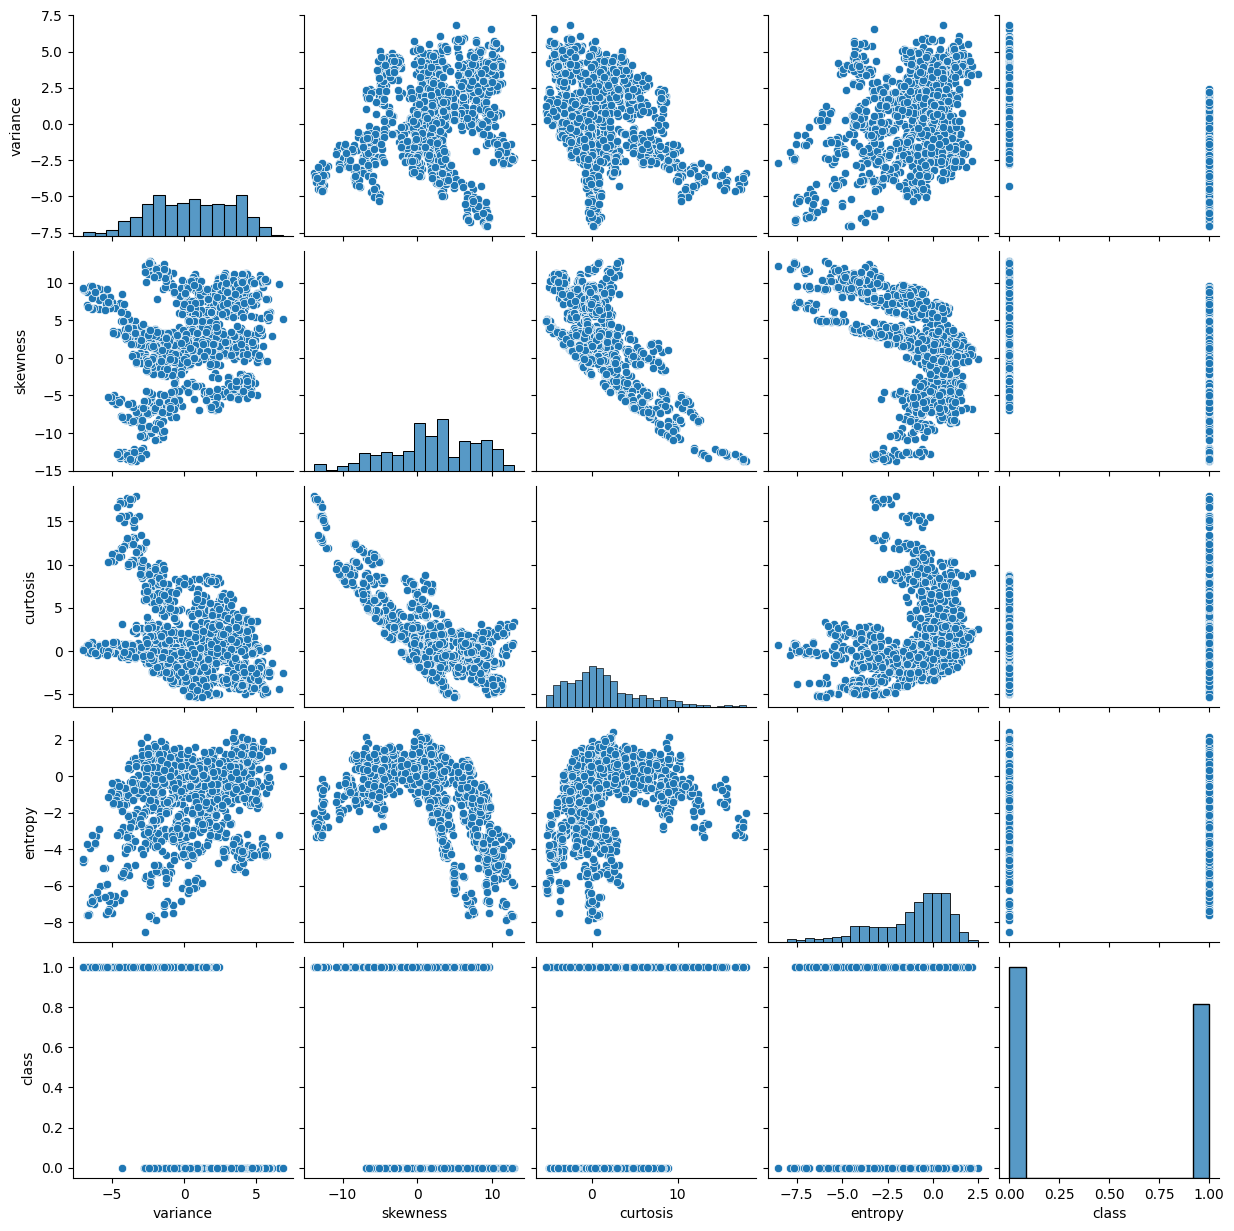

In [9]:
sns.pairplot(df)

# Boxplot

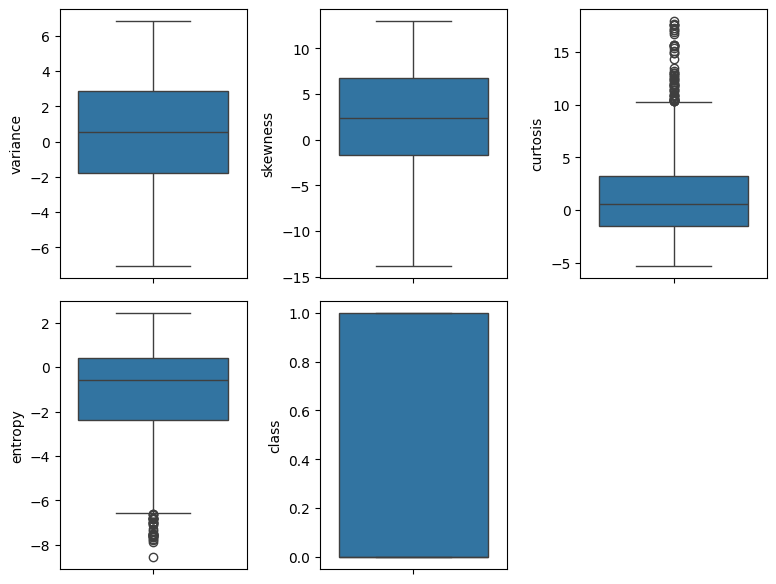

In [10]:
plt.figure(figsize=(8,6))
for i in range(len(df.columns)):
    if (i<5):
        plt.subplot(2,3,i+1)
        sns.boxplot(df[df.columns[i]])
        
plt.tight_layout()
plt.show()

# Observation
- As there are outliers in the entropy and curtosis feature we will apply log transfrom to them

In [11]:
# df['entropy'] = np.log1p(df['entropy'])
# df['curtosis'] = np.log1p(df['curtosis'])
# We can do this but it will make my valyes as nan becuase the value of log 0 invalid

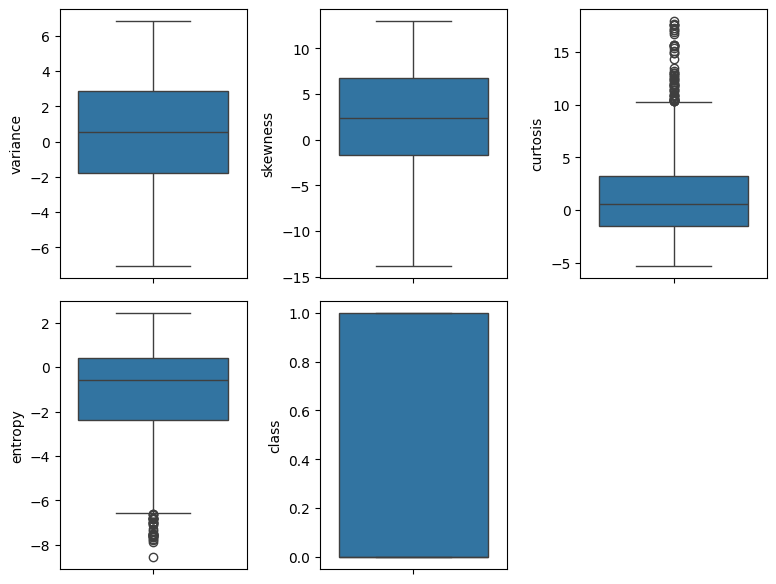

In [12]:
plt.figure(figsize=(8,6))
for i in range(len(df.columns)):
    if (i<5):
        plt.subplot(2,3,i+1)
        sns.boxplot(df[df.columns[i]])
        
plt.tight_layout()
plt.show()

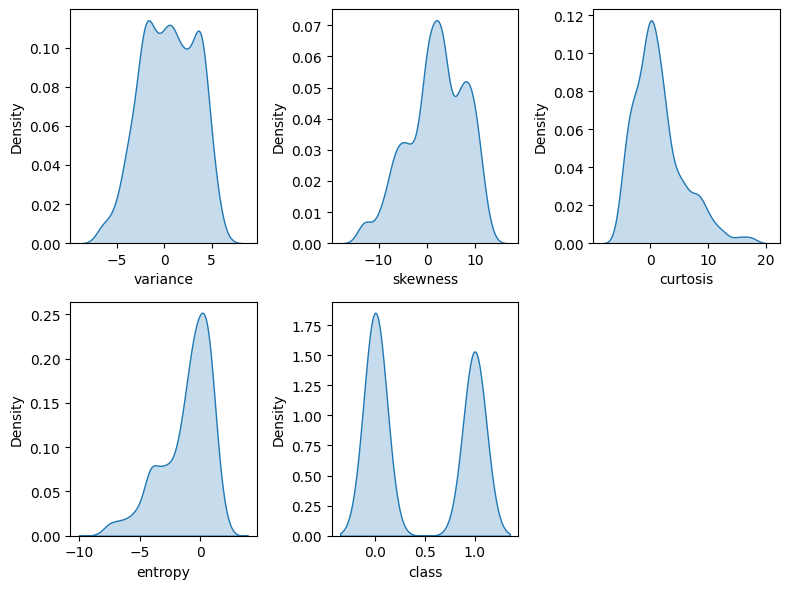

In [13]:
plt.figure(figsize=(8,6))
for i in range(len(df.columns)):
    if (i<5):
        plt.subplot(2,3,i+1)
        sns.kdeplot(df[df.columns[i]],shade = True)
        
plt.tight_layout()
plt.show()

# Correlation

In [14]:
df.corr()

,variance,skewness,curtosis,entropy,class
variance,1.000000,0.272863,-0.387171,0.273993,-0.735185
skewness,0.272863,1.000000,-0.785376,-0.520293,-0.449835
curtosis,-0.387171,-0.785376,1.000000,0.311379,0.154376
entropy,0.273993,-0.520293,0.311379,1.000000,-0.033979
class,-0.735185,-0.449835,0.154376,-0.033979,1.000000


# HeatMap

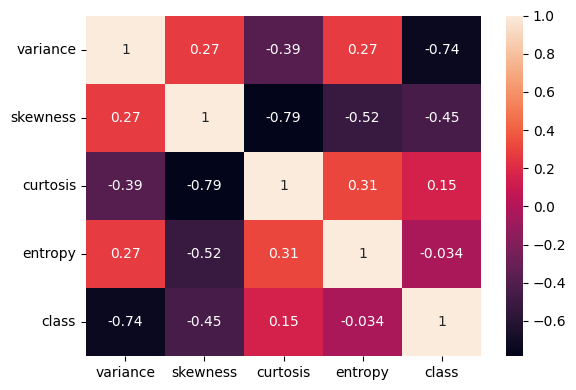

In [15]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),annot = True)
plt.tight_layout()
plt.show()

# Dependent Independent Features

In [16]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]
X

,variance,skewness,curtosis,entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1343,0.40614,1.34920,-1.4501,-0.55949
1344,-1.38870,-4.87730,6.4774,0.34179
1345,-3.75030,-13.45860,17.5932,-2.77710
1346,-3.56370,-8.38270,12.3930,-1.28230


In [17]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1343    1
1344    1
1345    1
1346    1
1347    1
Name: class, Length: 1348, dtype: int64

# Train Test split

In [18]:
from sklearn.model_selection import train_test_split

X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.25 , random_state=42 , stratify=Y)

# Box Plot

<Axes: >

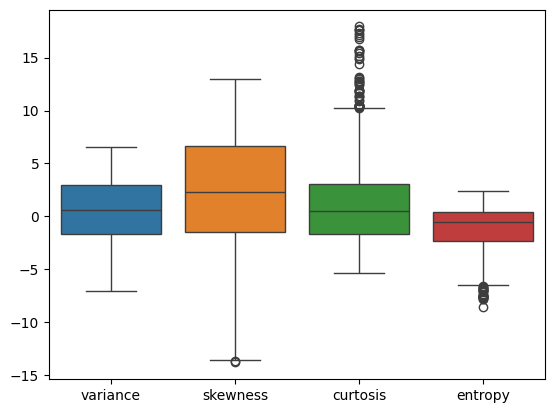

In [19]:
sns.boxplot(X_train)

# Standardizing

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Boxplot

<Axes: >

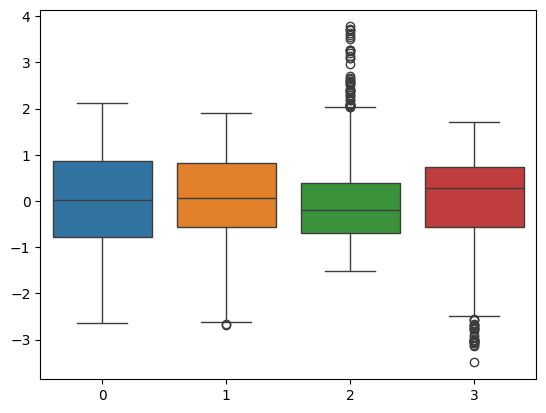

In [21]:
sns.boxplot(X_train)

# Model Training

In [22]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train , Y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


# Prediction

In [25]:
Y_pred_test = classifier.predict(X_test)
Y_pred_train = classifier.predict(X_train)
Y_pred_test

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,

# Performance Matrix on Test Data

In [26]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

print("The accuracy is =", accuracy_score(Y_test , Y_pred_test))
print(confusion_matrix(Y_test , Y_pred_test))
print(classification_report(Y_test , Y_pred_test))

The accuracy is = 0.9910979228486647
[[182   3]
 [  0 152]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       185
           1       0.98      1.00      0.99       152

    accuracy                           0.99       337
   macro avg       0.99      0.99      0.99       337
weighted avg       0.99      0.99      0.99       337



# Performance Matrix on Train Data

In [28]:
print("The accuracy is =", accuracy_score(Y_train , Y_pred_train))
print(confusion_matrix(Y_train , Y_pred_train))
print(classification_report(Y_train , Y_pred_train))

The accuracy is = 0.9970326409495549
[[550   3]
 [  0 458]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       553
           1       0.99      1.00      1.00       458

    accuracy                           1.00      1011
   macro avg       1.00      1.00      1.00      1011
weighted avg       1.00      1.00      1.00      1011



# Hyperparameter Tuninig

In [29]:
k = [3,5,7,9]
algo = ['kd_tree','ball_tree','brute']
leaf = [20,30,40]
p = [1,2]
weight = ['uniform','distance']

param = dict(n_neighbors = k , algorithm = algo , p = p , leaf_size = leaf , weights = weight)
param

{'n_neighbors': [3, 5, 7, 9],
 'algorithm': ['kd_tree', 'ball_tree', 'brute'],
 'p': [1, 2],
 'leaf_size': [20, 30, 40],
 'weights': ['uniform', 'distance']}

# Grid Search CV

In [30]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator=classifier , param_grid=param , n_jobs= -1 , cv = 5 , scoring='accuracy')
grid.fit(X_train , Y_train)
print("The Best Accuracy is =",grid.best_score_)
print(grid.best_params_)

The Best Accuracy is = 0.998019801980198
{'algorithm': 'kd_tree', 'leaf_size': 20, 'n_neighbors': 3, 'p': 2, 'weights': 'distance'}


# Randomized Search CV

In [31]:
from sklearn.model_selection import RandomizedSearchCV

rand = RandomizedSearchCV(estimator=classifier , param_distributions=param , n_jobs=-1 , scoring='accuracy' , cv = 5 , n_iter=25)
rand.fit(X_train , Y_train)
print("The best scroe is =",rand.best_score_)
print(rand.best_params_)

The best scroe is = 0.998019801980198
{'weights': 'distance', 'p': 2, 'n_neighbors': 3, 'leaf_size': 30, 'algorithm': 'brute'}


In [32]:
Y_pred_grid_test = grid.predict(X_test)
Y_pred_grid_test

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,

In [33]:
print("The accuracy is =", accuracy_score(Y_test , Y_pred_grid_test))
print(confusion_matrix(Y_test , Y_pred_grid_test))
print(classification_report(Y_test , Y_pred_grid_test))

The accuracy is = 0.9970326409495549
[[184   1]
 [  0 152]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       185
           1       0.99      1.00      1.00       152

    accuracy                           1.00       337
   macro avg       1.00      1.00      1.00       337
weighted avg       1.00      1.00      1.00       337



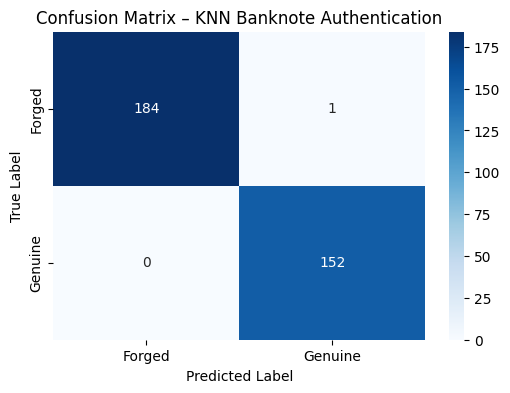

In [40]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(Y_test , Y_pred_grid_test), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Forged', 'Genuine'],
            yticklabels=['Forged', 'Genuine'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix – KNN Banknote Authentication')
plt.show()


In [35]:
import pickle
pickle.dump(grid,open('banknote_predict.pkl','wb'))

# Final Statement
- We have developed an bank note fraud detection model with an accuracy of 99.8%